In [32]:
import numpy as np

def k_means(x, k=3):
    index_list = np.arange(len(x))
    np.random.shuffle(index_list)
    centroids_index = index_list[:k]
    centroids = x[centroids_index]
    y = np.arange(len(x))
    iter_num = 10 #自行设置迭代次数
    for i in range(iter_num):
        y_new = np.arange(len(x))
        for i, xi in enumerate(x):
            '''
            补充代码，计算x中每个点属于哪个簇心，计算距离用np.linalg.norm()，计算簇心用np.argmin()
            '''
            y_new[i] = np.argmin([np.linalg.norm([e[l] - xi[l] for l in range(len(xi))]) for e in centroids])
        for j in range(k):
            '''
            补充代码，重新计算簇心，使用np.mean
            '''
            x_new = []
            for i in range(len(x)):
                if y_new[i] == j:
                    x_new.append(x[i])
            centroids[j] = np.mean(x_new)    
        y = y_new.copy()
    return y

if __name__ == '__main__':
    #可自行创造其他数据
    x = np.array([[1,1],[3,3],[1,7],[2,8],[10,20],[1,30],[10,11],[15,18],[12,19]])
    print(k_means(x))

[1 1 1 1 2 2 0 2 2]


In [3]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import time
np.random.seed()
percentage=0.2
iter=10

def prepare_data():
    iris = datasets.load_iris()
    '''
    补充代码，x为数据集的值，y为该数据集的标签，
    '''
    x = pd.DataFrame(iris['data'], columns = iris['feature_names'])
    y = pd.DataFrame(iris['target'])
    return x,y

def eva_kmeans(x,y):
    kmean_ei = 0.0
    kmean_rt = 0.0
    kmean_aa = 0.0
    for i in range(0, iter):
        '''
        补充代码，划分数据集，返回x_train，x_test，y_train，y_test
        '''
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

        k_begin = time.time()
        '''
        补充代码，调用KMeans包，并进行训练
        '''
        kmeans = KMeans(n_clusters=3, random_state=0).fit(x_train)
        kmeans_pred = kmeans.predict(x_test)
        k_end = time.time() - k_begin
        kmean_rt = kmean_rt + k_end
        '''
        补充代码，调用accuracy_score，返回正确分类样本数
        '''
        accuracy_number = metrics.accuracy_score(y_test, kmeans_pred, normalize=False)
        kmean_ei = kmean_ei + accuracy_number
        '''
        补充代码，调用accuracy_score，返回正确分类比例
        '''        
        accuracy_percentage = metrics.accuracy_score(y_test, kmeans_pred, normalize=True)
        kmean_aa = kmean_aa + accuracy_percentage

    kmean_ei = kmean_ei / (iter*1.0)
    kmean_rt = kmean_rt / (iter*1.0)
    kmean_aa = kmean_aa / (iter*1.0)
    return kmean_ei, kmean_rt, kmean_aa

def eva_hierarchical(x,y):
    hier_ei = 0.0
    hier_rt = 0.0
    hier_aa = 0.0
    for i in range(0, iter):
        '''
        补充代码，划分数据集，返回x_train，x_test，y_train，y_test
        '''
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

        k_begin = time.time()
        '''
        补充代码，调用层次聚类包，并进行训练
        '''   
        hier = AgglomerativeClustering(n_clusters=3).fit(x_train)
        hier_pred = hier.fit_predict(x_test)
        k_end = time.time() - k_begin
        hier_rt = hier_rt + k_end
        '''
        补充代码，调用accuracy_score，返回正确分类样本数
        '''
        accuracy_number = metrics.accuracy_score(y_test, hier_pred, normalize=False)

        hier_ei = hier_ei + accuracy_number
        '''
        补充代码，调用accuracy_score，返回正确分类比例
        '''        
        accuracy_percentage = metrics.accuracy_score(y_test, hier_pred, normalize=True)
        hier_aa = hier_aa + accuracy_percentage
    hier_ei = hier_ei / (iter*1.0)
    hier_rt = hier_rt / (iter*1.0)
    hier_aa = hier_aa / (iter*1.0)
    return hier_ei, hier_rt, hier_aa

if __name__ == '__main__':
    x,y=prepare_data()
    kmean_ei, kmean_rt, kmean_aa=eva_kmeans(x,y)
    hier_ei, hier_rt, hier_aa = eva_hierarchical(x, y)
    print ("total iterate:",iter)
    print ("method   ",  "# of error instances     ",  "run_time/s           ", "accuracy/%")
    print ("K-means          ",  kmean_ei,"          ",  kmean_rt,"      ",  kmean_aa)
    print ("hierarchical      ", hier_ei, "          ", hier_rt, "       ", hier_aa)


total iterate: 10
method    # of error instances      run_time/s            accuracy/%
K-means           16.9            0.0237015962600708        0.37555555555555553
hierarchical       8.5            0.0033043384552001952         0.18888888888888888


In [141]:
from sklearn.model_selection import GridSearchCV

#1.尝试调整不同参数组合，提高两类算法的聚类精度。
X,y=prepare_data()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
#kmeans算法调参
kmeans_param_grid = { 'algorithm': ["full", "elkan"], 'max_iter': [200, 300, 400]
                   ,'tol': [0.0001, 0.001, 0.0005]}
grid = GridSearchCV(KMeans(n_clusters = 3),param_grid = kmeans_param_grid, scoring = 'adjusted_rand_score', cv = 5)
grid.fit(X_train, y_train.values.reshape(y_train.size))
print("Kmeans最优参数:", grid.best_params_)
print("Kmeans聚类精度:", metrics.adjusted_rand_score(y_test.values.reshape(y_test.size), grid.predict(X_test)))

#层次聚类算法调参
linkage_list = ['complete', 'average', 'ward']
score_list = []
smax = 0
for l in linkage_list:
    model = AgglomerativeClustering(n_clusters = 3, linkage = l).fit(X_train)
    score_list.append(metrics.adjusted_rand_score(y_test.values.reshape(y_test.size), model.fit_predict(X_test)))
    if score_list[-1] >= smax:
        smax = score_list[-1]
        best_linkage = l
print("hierarchical最优参数： 'linkage':", best_linkage)
print("hierarchical聚类精度：", smax)

Kmeans最优参数: {'algorithm': 'full', 'max_iter': 200, 'tol': 0.0001}
Kmeans聚类精度: 0.8067233140583455
hierarchical最优参数： 'linkage': ward
hierarchical聚类精度： 0.7618538514994387


In [133]:
#2.结合不同的特征筛选方案，缩小训练集数据，并提高模型训练和检测时间
X,y=prepare_data()
X1 = [[x[0], x[1], x[2]] for x in X.values]
X2 = [[x[1], x[2], x[3]] for x in X.values]
X3 = [[x[0], x[2]] for x in X.values]
X = [X1, X2, X3]
for i in range(1, 4):
    kmean_ei, kmean_rt, kmean_aa=eva_kmeans(X[i - 1],y)
    hier_ei, hier_rt, hier_aa = eva_hierarchical(X[i - 1], y)
    print ("total iterate:",iter)
    print ("method   ",  "# data     ",  "run_time/s           ", "accuracy/%")
    print ("K-means          ",  "X" + str(i),"          ",  kmean_rt,"      ",  kmean_aa)
    print ("hierarchical      ", "X" + str(i), "          ", hier_rt, "       ", hier_aa)


total iterate: 10
method    # data      run_time/s            accuracy/%
K-means           X1            0.027912831306457518        0.32
hierarchical       X1            0.001710796356201172         0.05111111111111111
total iterate: 10
method    # data      run_time/s            accuracy/%
K-means           X2            0.021811842918395996        0.5377777777777778
hierarchical       X2            0.0012795448303222657         0.13777777777777778
total iterate: 10
method    # data      run_time/s            accuracy/%
K-means           X3            0.029878878593444826        0.2911111111111111
hierarchical       X3            0.0013373613357543946         0.09555555555555556


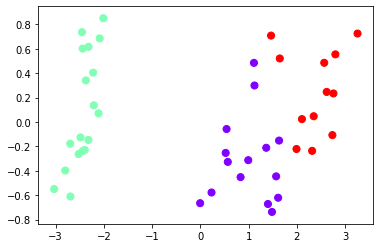

In [137]:
from sklearn import decomposition
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#3.将结果可视化，方便观测结果。
#通过PCA将4维数据降到2维来展示效果
X,y=prepare_data()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
model = KMeans(n_clusters = 3).fit(X_train)
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(X_test)
pos = pd.DataFrame()
plt.scatter(X[:,0], X[:,1],c=model.predict(X_test),s=50,cmap='rainbow')


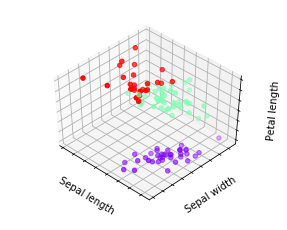

In [136]:
#通过Axes3D来展示效果
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X_train.values[:, 0], X_train.values[:, 1], X_train.values[:, 2], c=model.predict(X_train),cmap='rainbow')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
ax.dist = 12

fig.show()